## Mini-Batch Gradient Descent Quiz

#### Given: Dataset (as in data.csv)
#### Goal: Write a function that executes mini-batch gradient descent to find a best-fitting regression line.

In [13]:
# import necessary modules
import numpy as np
import matplotlib.pyplot as plt

# Setting a random seed, feel free to change it and see different solutions.
np.random.seed(42)

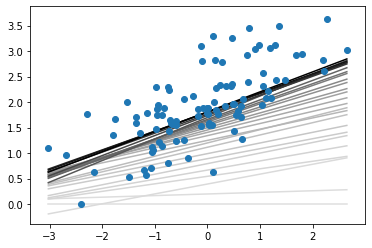

In [30]:
# TODO: Fill in code in the function below to implement a gradient descent
# step for linear regression, following a squared error rule. See the docstring
# for parameters and returned variables.

def MSEStep(X, y, W, b, learn_rate = 0.005):
    """
    This function implements the gradient descent step for squared error as a
    performance metric.
    
    Parameters
    X : array of predictor features
    y : array of outcome values
    W : predictor feature coefficients
    b : regression function intercept
    learn_rate : learning rate

    Returns
    W_new : predictor feature coefficients following gradient descent step
    b_new : intercept following gradient descent step
    """
    # Predict values and calculate error
    y_pred = np.matmul(X, W) + b
    error = y - y_pred
    
    # Use error to update W and b
    W_new = W + learn_rate * np.matmul(error, X)
    b_new = b + learn_rate * error.sum()
   
    return W_new, b_new

# The parts of the script below will be run when you press the "Test Run"
# button. The gradient descent step will be performed multiple times on
# the provided dataset, and the returned list of regression coefficients
# will be plotted.
def miniBatchGD(X, y, batch_size = 20, learn_rate = 0.005, num_iter = 25):
    """
    This function performs mini-batch gradient descent on a given dataset.

    Parameters
    X : array of predictor features
    y : array of outcome values
    batch_size : how many data points will be sampled for each iteration
    learn_rate : learning rate
    num_iter : number of batches used

    Returns
    regression_coef : array of slopes and intercepts generated by gradient
      descent procedure
    """
    n_points = X.shape[0]
    W = np.zeros(X.shape[1]) # coefficients
    b = 0 # intercept
    
    # run iterations
    regression_coef = [np.hstack((W,b))]
    for _ in range(num_iter):
        batch = np.random.choice(range(n_points), batch_size)
        X_batch = X[batch,:]
        y_batch = y[batch]
        W, b = MSEStep(X_batch, y_batch, W, b, learn_rate)
#         print(W, b)
        regression_coef.append(np.hstack((W,b)))
    
    return regression_coef


if __name__ == "__main__":
    # perform gradient descent
    data = np.loadtxt('../Datasets/graddesc_data.csv', delimiter = ',')
    X = data[:,:-1]
    y = data[:,-1]
    regression_coef = miniBatchGD(X, y)
    
    # plot the results
    import matplotlib.pyplot as plt
    
    plt.figure()
    X_min = X.min()
    X_max = X.max()
    counter = len(regression_coef)
    for W, b in regression_coef:
        counter -= 1
        color = [1 - 0.92 ** counter for _ in range(3)]
        plt.plot([X_min, X_max],[X_min * W + b, X_max * W + b], color = color)
    plt.scatter(X, y, zorder = 3)
    plt.show()